# Property Distribution of the Mobley Database

_(30.09.19)_

## Aim:

- Introduction to Matplotlib and Pandas.
- Refresher for RDKit
- Represent property distribution of the Mobley database using histograms.
- Visualise ligands for property extremes.

### Extracting database
Structure data format (SDF) files were exported from GitHub (https://github.com/MobleyLab/FreeSolv) and the tar.gz extracted.

In [1]:
!tar -xf sdffiles.tar.gz

### Calculating descriptors
Dictionary with keys for entry ID and molecular descriptos was created with empty lists as values.

Mobley IDs and the following molecular descriptors were calcualted and appneded to the dictionary.
1. Molecular weight (MW)
1. Crippen atomic permeability partition coefficient (AlogP)
1. Number of hydrogen bond acceptors (HBA)
1. Number of hydrogen bond donors (HBD)
1. __Active Groups__

In [117]:
from glob import glob
from rdkit import Chem

# empty dictionary for ligand IDs and corresponding descriptros.
data = {'Entry ID': [], 'MW (Da)': [], 'AlogP': [], 'HBA': [], 'HBD': [],}

for sdf in glob('sdffiles/*.sdf'):
    
    # add ligand Mobley IDs
    ID = sdf.strip('sdffiles/.')
    data['Entry ID'].append(ID)
    
    # add calculated descriptors
    suppl = SDMolSupplier(sdf)
    for mol in suppl:
        data['MW (Da)'].append(Chem.Descriptors.MolWt(mol))
        data['AlogP'].append(Chem.Crippen.MolLogP(mol))
        data['HBA'].append(Chem.Lipinski.NumHAcceptors(mol))
        data['HBD'].append(Chem.Lipinski.NumHDonors(mol))

# Num_NH_OH = Lipinski.NHOHCount

Use Pandas to store calculated descriptors and for simple Matplotlib implimentation.

In [30]:
import pandas as pd

df = pd.DataFrame(data)
print(df)

           Entry ID  MW (Da)   AlogP  HBA  HBD
0    mobley_5852491   84.162  2.1965    0    0
1    mobley_9838013   88.150  1.1673    1    1
2    mobley_2410897   45.085 -0.0350    1    1
3    mobley_1893815  167.850  2.5954    0    0
4    mobley_2008055   30.070  1.0262    0    0
..              ...      ...     ...  ...  ...
637  mobley_4149784  253.084  4.8914    2    0
638  mobley_6497672   70.091  0.7614    1    0
639  mobley_9534740  180.156 -3.2214    6    5
640  mobley_3980099  181.449  3.6468    0    0
641  mobley_2727678  237.984 -0.3322    2    2

[642 rows x 5 columns]


#### Drug-like chemical space

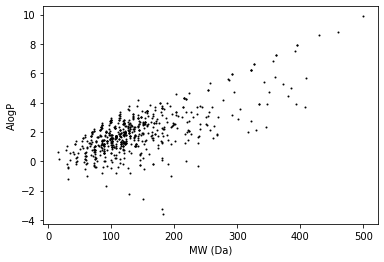

In [98]:
from matplotlib import pyplot as plt

df.plot(kind='scatter', x='MW (Da)', 
        y='AlogP', color='black', edgecolor='black', s=1)

#### Descriptor histograms
A function was written to plot a histogram for any specified DataFrame column.

In [120]:
def plot_hist(property, bin_range):
    '''Enter column name from df as property 
    and specify range() as bin range.'''
    
    df[property].plot(kind='hist', bins=bin_range, color='white', 
                       edgecolor='black', xticks=bin_range)
    plt.xlabel(property)
    plt.show()

A function to display the structure with the largest property value was written.

In [1]:
def show_last_structure(dataframe, property):

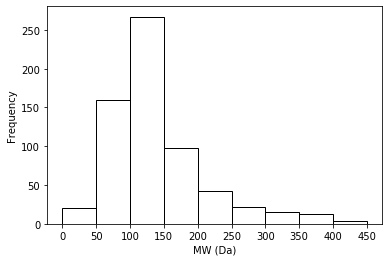

In [121]:
# Molecular weight
plot_hist('MW (Da)', range(0, 500, 50))
sorted_MW = df.sort_values('MW (Da)')
# print(sorted_MW)

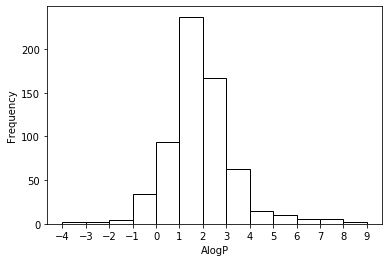

In [108]:
# AlogP
plot_hist('AlogP', range(-4, 10, 1))

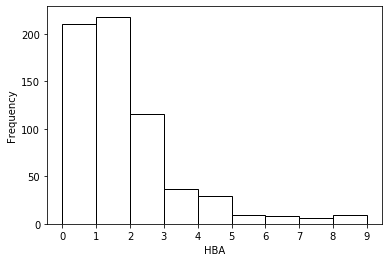

In [109]:
# H-bond acceptors
plot_hist('HBA', range(0, 10, 1))

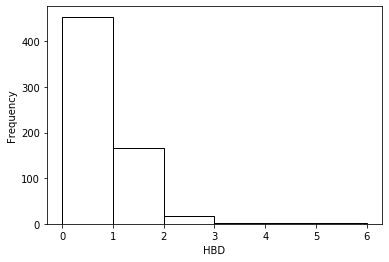

In [110]:
# H-bond donors
plot_hist('HBD', range(0, 7, 1))